<a href="https://colab.research.google.com/github/atkinsonde/524/blob/main/Clustser_code_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
import numpy as np
import pandas as pd

list_of_files = glob.glob("*.txt")           # create the list of files

list_of_files.sort()

stn = []
year = []
month = []
day = []
Tval = []           
date = []

fn_total= len(list_of_files)
#variables = [0 for _ in range(fn_total)]

fn = 0

for file_name in list_of_files:
  fn=fn+1 # limit the files wa are reading in
  if fn < fn_total: #   if 1==1  The 1==1 is just an indentation place holder so I don't have to unindent everything
      FI = open(file_name, 'r')
      #print(fn, file_name)
      #print(FI)

      count=0    
      
      for line in FI:
          #print(line)
          #### THIS PART GRABS AND CLEANS A NICE STATION NAME 
          #### USE THIS AS THE NAME OF A VARIABLE THAT CONTAINS ONLY THAT STATION'S DATA
          count=count+1
          if count==1:
#              stn_name_raw=line[8:53]              
             stn_name_raw = line[8:30]
             comma2=stn_name_raw.find(",")
             stn_name=stn_name_raw[0:comma2]
             stn_name=stn_name.replace(" ","_")
             stn_name=stn_name.replace("'","_") # a couple of stn names have apostrophes that should be replaced
             stn_name=stn_name.replace(".","_")             
          
             for str_index in range(len(stn_name)-1,-1,-1): #this cleans up the station file names
                  if stn_name[str_index]!="_":
                      break
                  else:
                      stn_name=stn_name[0:str_index]
             print(stn_name)
             
                          
          if count > 4: #skip the first four lines of header informaiton
            #### THIS PART READS IN THE MONTHLY VALUES
              
            yr = line[1:5]              
            
            dy=1
            for mo in range(1,13):              
                start = 6 + ((mo-1) * 11)
                end = start+8
                val = line[start:end]
              
                if float(val) < -100:
                     break
                 
                stn.append(stn_name)
                year.append(yr)
                month.append(mo)
                day.append(dy)
                Tval.append(float(val))            
                date.append(str(yr)+":"+str(mo)+":"+str(dy))
      FI.close()

                
big_set = pd.DataFrame(
        {'station': stn,
       'year': year,
       'month': month,
       'day': day,
       'Tval': Tval,
       'date':date
       })


big_set['date'] = pd.to_datetime(big_set['date'],
       format='%Y:%m:%d')    


In [62]:
Station_timings = big_set.groupby(["date","station"]).size() \
          .unstack(level = 'station' , fill_value = 0) 

#This gives us a count of whether a station existed at a given time
Station_timings = big_set.groupby(["date", "station"]) \
          .size().unstack(level = 1, fill_value = 0) 


tvals = big_set[['date','station','Tval']]
tvals_cols = tvals.groupby(["date", "station"]).max().unstack(level=1) 
    # max is a filler function here, to pull out the value. I'm sure there is a better way to do it!

#subset by date
tvals_cols_date = tvals_cols.loc['1980-1-1':'1985-1-1']

tvals_cols_date_T = tvals_cols_date.transpose()

#throw out any rows that have NaNs in them
tvals_cols_date_x = tvals_cols_date_T.dropna(axis=0,how='any')


In [63]:
tvals_cols = tvals.groupby(["date", "station"]).max().unstack(level=1) 

In [ ]:
tvals_cols_date_x.T

In [ ]:
big_set

In [64]:
# K-means
#!pip install tslearn
#from tslearn.clustering import TimeSeriesKMeans

model = TimeSeriesKMeans(n_clusters=7, metric="dtw", max_iter=10)

model.fit(tvals_cols_date_x)
cities_list = tvals_cols_date_x.index.get_level_values('station').tolist()

In [65]:
y=model.predict(tvals_cols_date_x)

/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning:

2-Dimensional data passed. Assuming these are 240 1-dimensional timeseries



In [66]:
y

array([5, 4, 2, 3, 2, 3, 3, 4, 0, 3, 0, 0, 3, 3, 2, 3, 6, 1, 5, 0, 3, 1,
       0, 3, 4, 4, 4, 4, 5, 5, 0, 2, 6, 6, 3, 1, 2, 2, 6, 1, 5, 4, 6, 6,
       2, 2, 0, 6, 3, 0, 6, 3, 2, 1, 2, 2, 0, 6, 6, 3, 3, 3, 3, 3, 2, 3,
       5, 4, 0, 2, 6, 2, 2, 1, 1, 1, 1, 0, 2, 6, 0, 0, 2, 2, 1, 3, 0, 3,
       2, 6, 2, 0, 6, 6, 3, 6, 4, 6, 6, 1, 2, 3, 2, 4, 4, 4, 2, 0, 6, 2,
       6, 2, 6, 3, 6, 1, 6, 4, 1, 3, 5, 2, 3, 2, 2, 0, 6, 4, 1, 3, 3, 3,
       1, 6, 3, 6, 6, 3, 3, 3, 3, 3, 6, 4, 6, 0, 2, 1, 2, 3, 2, 0, 6, 6,
       3, 6, 6, 2, 2, 2, 1, 6, 6, 2, 3, 0, 0, 4, 0, 5, 0, 2, 0, 5, 5, 3,
       0, 5, 2, 3, 4, 6, 6, 3, 2, 5, 4, 6, 5, 2, 3, 1, 2, 3, 5, 3, 3, 2,
       0, 2, 3, 6, 3, 0, 0, 3, 6, 3, 6, 6, 3, 6, 0, 3, 0, 0, 3, 2, 1, 3,
       2, 6, 2, 5, 6, 5, 6, 2, 2, 1, 2, 2, 0, 6, 3, 0, 6, 6, 1, 2])

In [67]:
x=tvals_cols_date_x.T.index
data_array = tvals_cols_date_x.to_numpy()

In [68]:
data_array.shape

(240, 61)

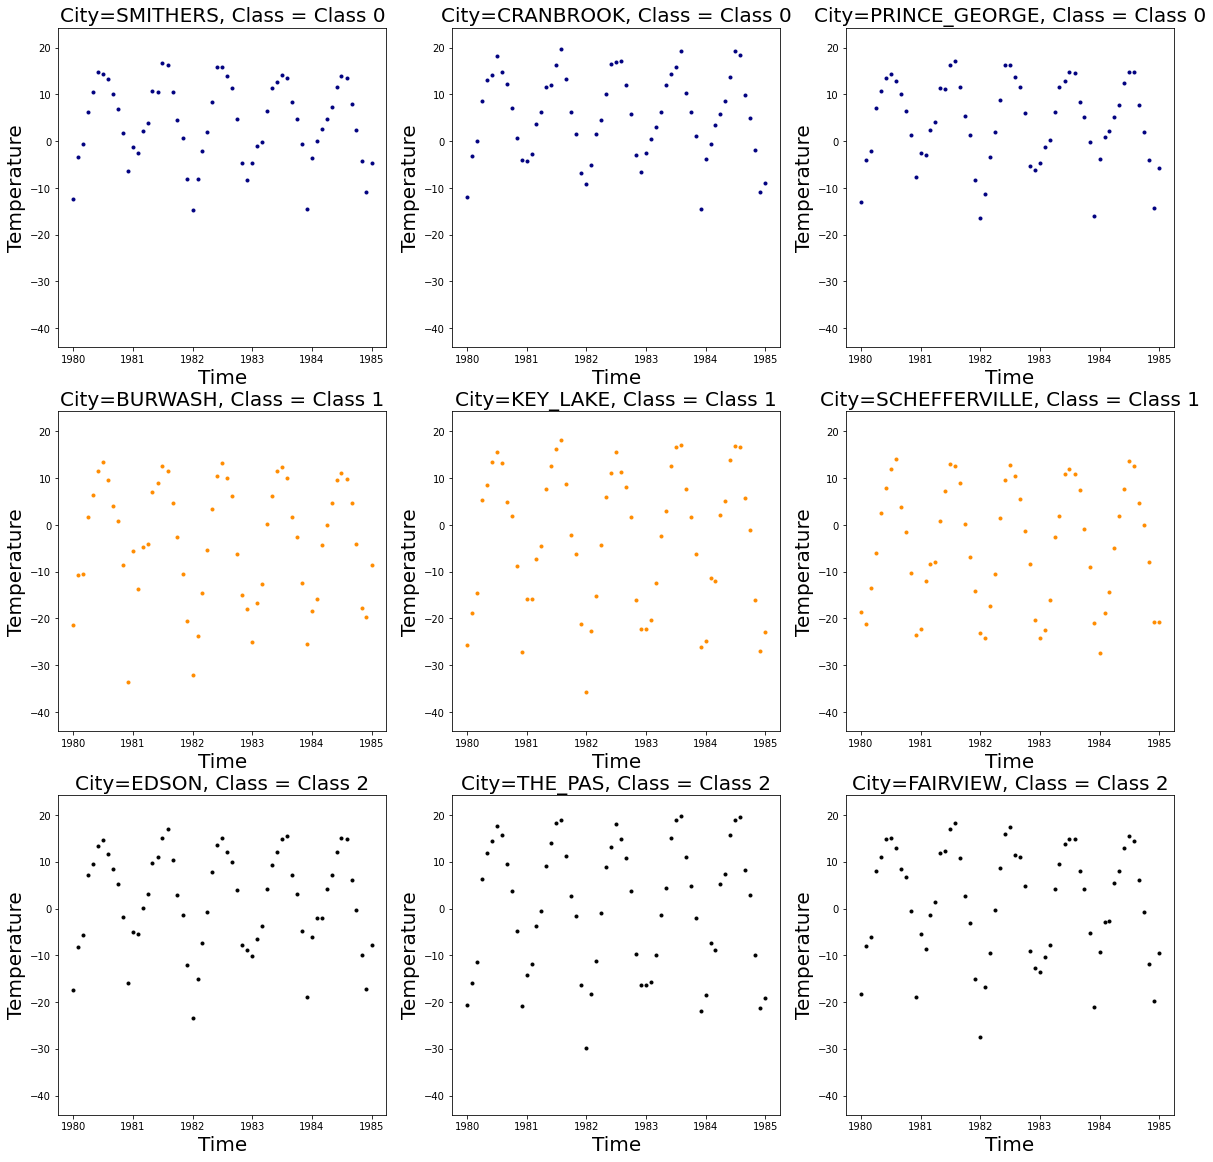

In [69]:
plt.figure(figsize=(20,20))
k_dict = {'1':0,'2':0,'3':0,'4':1,'5':1,'6':1,'7':2,'8':2,'9':2}
colors = ['navy']*3+['darkorange']*3+['k']*3
Names = ['Class 0']*3+['Class 1']*3+['Class 2']*3
for j in range(1,10):
    plt.subplot(3,3,j)
    k = np.random.choice(np.where(y==k_dict[str(j)])[0])
    plt.plot(x,data_array[k],'.',color=colors[j-1])
    plt.ylabel('Temperature',fontsize=20)
    plt.xlabel('Time',fontsize=20)
    plt.title('City=%s, Class = %s'%(cities_list[k],Names[j-1]),fontsize=20)
    plt.ylim(data_array.min(),data_array.max())

In [ ]:
# map y onto station location database

In [74]:
#from scipy.cluster.hierarchy import dendrogram, linkage
#from matplotlib import pyplot as plt
#import scipy.cluster.hierarchy as hac

#Z = linkage(tvals_cols_date_x, method='median')

finstn = tvals_cols_date_x.reset_index()
stns = finstn['station']

labelList = [stns[i] for i in range(0, len(stns))]

#plt.figure(figsize=(20, 15))
#plt.title('Hierarchical Clustering Dendrogram')
#plt.xlabel('sample index')
#plt.ylabel('distance')

#dendrogram(
#    Z,
#    orientation='right',
#    labels=labelList,
#    leaf_rotation=0.,  # rotates the x axis labels
#    leaf_font_size=15.,  # font size for the x axis labels
#)
#plt.show()


In [78]:
labelList.count

<function list.count(value, /)>

In [80]:
############ MAPPING 
## Extract stations to plot
station_metadata = pd.read_csv(r"Homo_station_metadata.csv")           # create the list of file

#make station names identical to the data station names
station_metadata['station'] = station_metadata['station'].str.replace(' ', '_')
station_metadata['station'] = station_metadata['station'].str.replace("'", '_')
station_metadata['station'] = station_metadata['station'].str.replace(".", '_')


# need a file that merges lat lon and category by stn_name
#num_clust1 = 7
#part1 = hac.fcluster(Z, num_clust1, 'maxclust')


plot_set = pd.DataFrame(
        {'station': labelList,
         'cluster': y+1,
       }) #y+1 so the clusters don't start at cluster 0

plot_set= plot_set.join(station_metadata.set_index('station'), on='station')    


import plotly

df=plot_set
data = [ dict(
        type = 'scattergeo',
        lon = df['lon'],
        lat = df['lat'],
        text = df['station'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            colorscale='Rainbow',
            #autocolorscale = True,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            cmin = 1,
            color = df['cluster'],
            cmax = df['cluster'].max(),                    
            colorbar=dict(
                title="Clusters"
            )
        ))]


layout = dict(
        title = 'Median method results, 7 clusters retained',
        colorbar = True,
        geo = dict(
            scope='north america', # this didn't seem to work
            resolution=50, # improve coastline detail
            projection=dict( type='conic conformal', rotation=dict(lon=-100) ), # this doesn't appear to work
 #           projection=dict( type='mercator'), 
            showland = True,
            lonaxis = dict( range= [ -140.0, -45.0 ] ),
            lataxis = dict( range= [ 40.0, 85.0 ] ),
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(117, 117, 117)",
            countrycolor = "rgb(17, 17, 17)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )


fig = dict( data=data, layout=layout )
plotly.offline.plot(fig, validate=False, filename=r'Median_7.html')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



'Median_7.html'

In [ ]:
plot_set 